In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from models.HH import *
from models.LIF import * 
from models.Ishikevich import *
from models.morrislecar import *
from utils.load import *
import matplotlib.animation as animation

In [2]:
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)


#### Results from Experiment 2a/configuration of the gap junction coupling

HH parameters

In [3]:
params_HH = load_HH()
k = 0.012 #strength of the gap junction coupling
Isyn = [ [0, 0.05] , [0, 0.05]] #delta peak of the chemical synapse
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2

#Initial conditions of the HH model important quantities
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 

#time constants
dt = 0.01
t_final = 300

In [4]:
#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1

#data2aHH, completeHH = rk_simplemodel(dt,t_final,2,[V0,V0],[n0,n0],[m0,m0],[h0,h0],gna,gk,gl,Ena,Ek,El,C,I1,Isyn,k,tau)
data2aHH, completeHH_2a = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I1,Isyn,k,tau)
data2, completeHH_2a_2 = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I2,Isyn,k,tau)

Integrate and fire parameters

In [5]:
params_LIF = load_LIF()
#Same as before
k = 0.012
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]

#filtering order
order = 2

#Initial conditions for the LIF
y0 = [-70, -70]

#Time conditions
t_final = 300
dt = 0.01 

In [6]:
data2aIF, completeIF_2a = rk_if(dt,t_final,order,y0,*params_LIF,I1,Isyn,k,tau,1)
data2b, complete_IF_2a = rk_if(dt,t_final,order,y0,*params_LIF,I2,Isyn,k,tau,1)

Izhikevich Parameters

In [7]:
params_IZH = load_ISH()

k_izh = 0.04
dt = 0.01
t_final = 300
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(4999,15000):
    I1[i,0] = 1.5
    I2[i,0] = -1.5
order = 2
y0 = [-70,-70]
u0 = [0.0,0.0]


data2Ish, completeIsh1 = rk_ish(dt,t_final,order,y0,u0,I1,Is,*params_IZH,k_izh,tau)
data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau)

Morris-Lecar

In [8]:
params_ML = load_ML()

k_ML = 0.008
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]
Isyn = np.array(Isyn)

#filtering order
order = 2

#Initial conditions for the ML
y0 = [-71.70562658780625 , -71.70562658780625]
w0 = [0.00075, 0.00075]

#Time conditions
t_final = 300
dt = 0.01 


In [9]:
#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))


for i in range(4999,15000):
    I1[i,0] = 0.5 #changes the amplitude
    I2[i,0] = -0.5

data2aML, completeML = rk_ml(dt,t_final,2,y0,w0,*params_ML,I1,Isyn,k_ML,tau)
data2ML, completeML2 = rk_ml(dt,t_final,2,y0,w0,*params_ML,I2,Isyn,k_ML,tau)

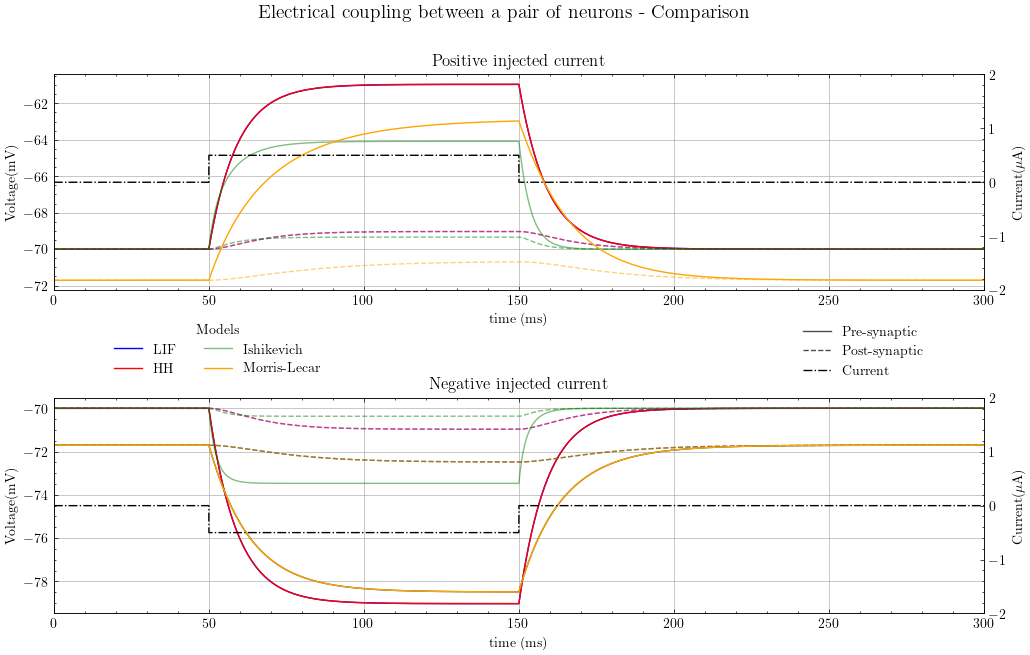

In [10]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')


ax3 = ax1.twinx()
ax4 = ax2.twinx() 
ax1.title.set_text('Positive injected current')
ax2.title.set_text('Negative injected current')

color = 'black'

ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax4.set_ylabel(r'Current($\mu$A)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)

ax3.set_ylim(-2,2)
ax4.set_ylim(-2,2)

fig.suptitle('Electrical coupling between a pair of neurons - Comparison',fontsize=14)
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)
lns1 = ax1.plot(time,data2aIF[:,0], label = 'LIF', color = 'b')
lns2 = ax1.plot(time,data2aHH[:,0], label = 'HH', color = 'r' )
lns3 = ax1.plot(time,data2aIF[:,1], 'b--', alpha = 0.5)
lns4 = ax1.plot(time,data2aHH[:,1], 'r--', alpha = 0.5)
lns5 = ax1.plot(time,data2Ish[:,0], label = 'Ishikevich', color = 'g', alpha = 0.5)
lns6 = ax1.plot(time,data2Ish[:,1], 'g--', alpha = 0.5)
lns7 = ax1.plot(time,data2aML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax1.plot(time,data2aML[:,1], '--',color = 'orange', alpha = 0.5)
lnsc = ax3.plot(time,I1[:,0],'-.', color = 'black')

lns1 = ax2.plot(time,data2b[:,0], label = 'LIF', color = 'b')
lns2 = ax2.plot(time,data2[:,0], label = 'HH', color = 'r')
lns3 = ax2.plot(time,data2b[:,1],'b--', alpha = 0.5)
lns4 = ax2.plot(time,data2[:,1], 'r--', alpha = 0.5)
lns5 = ax2.plot(time,data2ish[:,0], label = 'Izhikevich', color = 'g', alpha = 0.5)
lns6 = ax2.plot(time,data2ish[:,1], 'g--', alpha = 0.5)
lnsp = ax2.plot(time,data2ML[:,0], label = 'Pre-synaptic', alpha=0.7,color = 'black')
lnss = ax2.plot(time,data2ML[:,1], '--',color = 'black', alpha = 0.7, label = 'Post-synaptic')
lns7 = ax2.plot(time,data2ML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax2.plot(time,data2ML[:,1], '--',color = 'orange', alpha = 0.5)

lnsc = ax4.plot(time,I2[:,0],'-.', label= 'Current',color = 'black')

#ax1.set_ylim(-71.71,-71.69)
#ax1.set_xlim(290,300)

#ax2.set_ylim(-71.71,-71.705)
#ax2.set_xlim(290,300)

lns = lnsp + lnss + lnsc
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc = (0.8,1.07))

ax1.grid()
ax2.grid()
ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 2 )
plt.show()

In [11]:
El = -70
variationHHgj = np.zeros((len(data2aHH[:,0]),1))
deltav1 = np.array(abs(El-data2aHH[:,0]))
deltav2 = np.array(abs(El-data2aHH[:,1]))
gj_transmission = deltav2 / deltav1
variationHHgj[:,0] = gj_transmission

variationLIFgj = np.zeros((len(data2aIF[:,0]), 1))
deltav1 = np.array(abs(El - data2aIF[:,0]))
deltav2 = np.array(abs(El - data2aIF[:,1]))
gj_transmission = deltav2 / deltav1
variationLIFgj[:,0] = gj_transmission

variationIsh = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2Ish[:,0]))
deltav2 = np.array(abs(El - data2Ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh[:,0] = gj_transmission

variationIsh2 = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2ish[:,0]))
deltav2 = np.array(abs(El - data2ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh2[:,0] = gj_transmission

variationML = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2aML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2aML[:,1]))
gj_transmission = deltav2 / deltav1
variationML[:,0] = gj_transmission

variationML2 = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2ML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2ML[:,1]))
gj_transmission = deltav2 / deltav1
variationML2[:,0] = gj_transmission


/tmp/ipykernel_4955/3862380659.py:5: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_4955/3862380659.py:11: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_4955/3862380659.py:17: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_4955/3862380659.py:23: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_4955/3862380659.py:29: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_4955/3862380659.py:35: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1


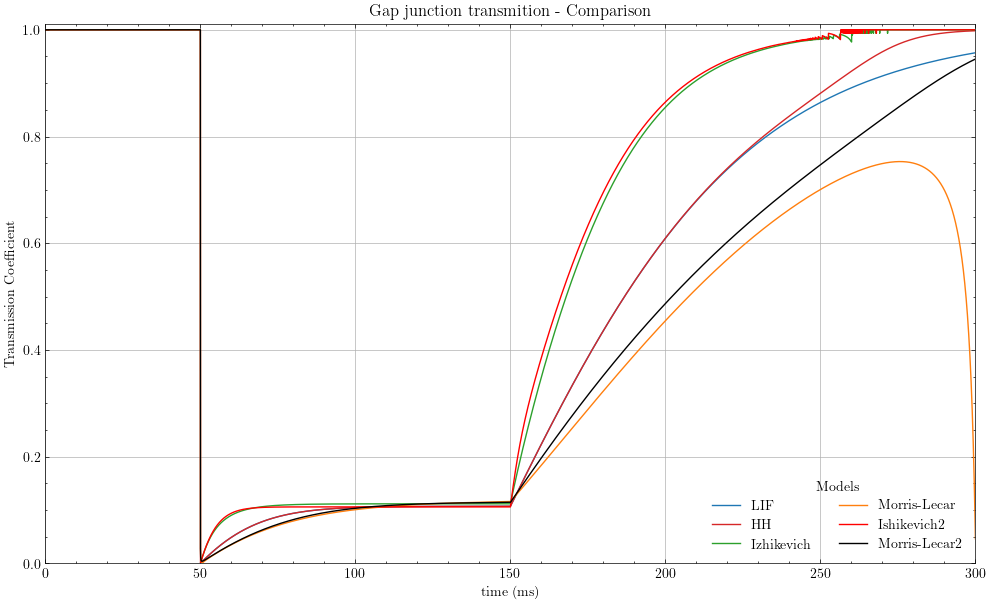

In [12]:
t_final = 300
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('time (ms)')
plt.ylabel('Transmission Coefficient')

plt.xlim(0,300)
plt.ylim(0,1.01)

plt.plot(time,variationLIFgj, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML, color = 'tab:orange', label = 'Morris-Lecar')
plt.plot(time,variationIsh2, color = 'red',label = 'Ishikevich2')
plt.plot(time,variationML2, color = 'black', label = 'Morris-Lecar2')
plt.title('Gap junction transmition - Comparison')
plt.legend(title='Models',ncols=2)
plt.grid()

#### Results from 4Aa

HH model

In [13]:
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1
k = 0.012
order = 1

In [14]:
V0 = -70 
n0 = 0.2
m0 = 0.1 
h0 = 0.6 
dt = 0.01 
t_final = 100

I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))
I[:,0] = np.sin(2 * np.pi * 0.04 * t) #t in ms, so f in Hz 
data4aHH, completeHH_4a = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)

LIF model

In [15]:
Is = [ [0, 0.05], [0.05, 0]]
order = 2
y0 = [-70, -70]
dt = 0.01 
t_final = 100

I = np.zeros(( int(t_final/dt), 2))
t = np.linspace(0,t_final, int(t_final/dt))
I[:,0] = 1 + np.sin(2* np.pi * 0.04 * t)
data4aIF, complete_IF_4a = rk_if(dt,t_final,order,y0,*params_LIF,I,Is,k,tau,1)

Ishikevich model

In [16]:
dt = 0.01
t_final = 100
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)

I = np.zeros(( int(t_final/dt), 2))
t = np.linspace(0,t_final, int(t_final/dt))
I[:,0] =  -0.5 +  np.sin(2* np.pi * 0.04 * t)

y0 = [-70,-70]
u0 = [0.0,0.0]

data4aIsh, complete_Ish_4a = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)

Morris-Lecar model

In [17]:
dt = 0.01
t_final = 100
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)

I = np.zeros(( int(t_final/dt), 2))
t = np.linspace(0,t_final, int(t_final/dt))
I[:,0] =  -1 + np.sin(2* np.pi * 0.04 * t)

#Initial conditions for the ML
y0 = [-71.70562658780625 , -71.70562658780625]
w0 = [0.0, 0.0]

data4aML, complete_ML_4a = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Is,k_ML,tau)

In [18]:
I_HH = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))
I_HH[:,0] = -0.5 + np.sin(2 * np.pi * 0.04 * t)

I_LIF = np.zeros(( int(t_final/dt), 2))
I_LIF[:,0] = 1 + np.sin(2* np.pi * 0.04 * t)

I_ISH = np.zeros(( int(t_final/dt), 2))
I_ISH[:,0] =   np.sin(2* np.pi * 0.04 * t)

I_ML = np.zeros(( int(t_final/dt), 2))
I_ML[:,0] =  -1 +  np.sin(2* np.pi * 0.04 * t)

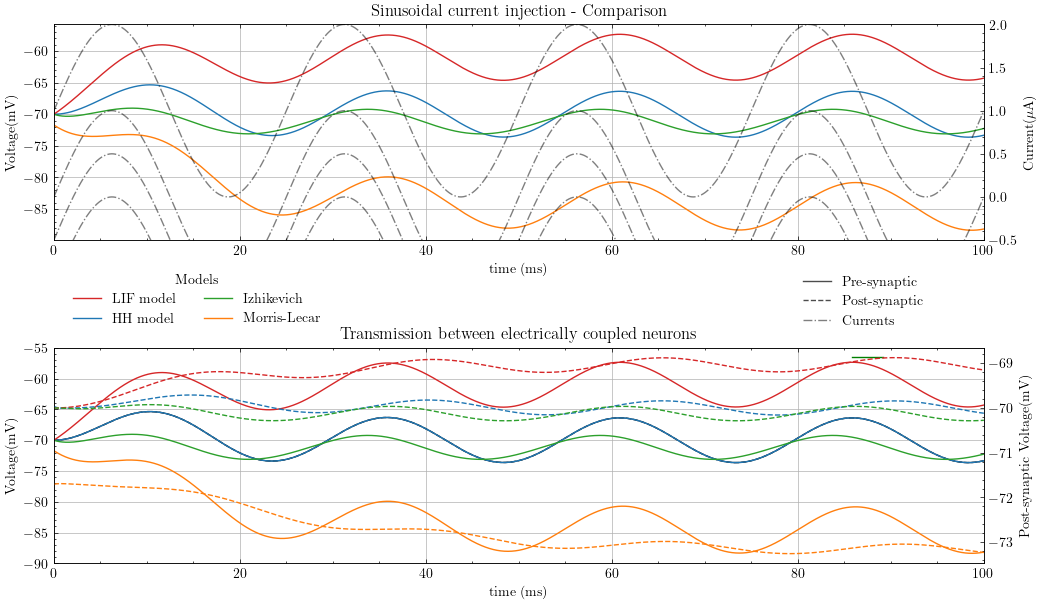

In [19]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
color = 'black'
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)', color = color)
ax2.set_ylabel('Voltage(mV)', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2.tick_params(axis = 'y', labelcolor = color)

ax3 = ax1.twinx()
ax4 = ax2.twinx() 

color = 'black'

ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax4.set_ylabel('Post-synaptic Voltage(mV)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)



ax1.title.set_text('Sinusoidal current injection - Comparison')
ax2.title.set_text('Transmission between electrically coupled neurons')

ax3.set_ylim(-0.5,2)
ax2.set_ylim(-90,-55)
ax1.set_xlim(0,100)
ax2.set_xlim(0,100)
#lns1 = ax1.plot(time,I[:,0], color = 'tab:green', label = 'Current')
lns3 = ax1.plot(time,data4aHH[:,0], color = 'tab:blue', label = 'HH model')
lns4 = ax1.plot(time,data4aIF[:,0], color = 'tab:red', label = 'LIF model')
lns5 = ax1.plot(time,data4aIsh[:,0], color = 'tab:green', label = 'Izhikevich')
lns6 = ax1.plot(time,data4aML[:,0], color = 'tab:orange', label = 'Morris-Lecar')
lnsc1 = ax3.plot(time,I_HH[:,0],'-.',color='black', alpha = 0.5)
lnsc2 = ax3.plot(time,I_LIF[:,0],'-.',color='black', alpha = 0.5)
lnsc3 = ax3.plot(time,I_ISH[:,0],'-.',color='black', alpha = 0.5, label = 'Currents')
lnsc4 = ax3.plot(time,I_ML[:,0], '-.', color = 'black', alpha = 0.5)


lns = lns4 + lns3 + lns5 + lns6
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs, bbox_to_anchor=(0.3,-0.1), title='Models', ncols = 2)

lns1 = ax2.plot(time,data4aHH[:,0],'--',color = 'black', alpha=0.7, label = 'Post-synaptic')
lns2 = ax2.plot(time,data4aHH[:,0], color = 'black', alpha=0.7, label = 'Pre-synaptic')
lns8 = ax2.plot(time,data4aHH[:,0], color = 'tab:blue')
lns5 = ax4.plot(time,data4aHH[:,1], '--', label = 'Post-synaptic', color = 'tab:blue')
lns6 = ax2.plot(time,data4aIF[:,0] ,color = 'tab:red')
lns7 = ax4.plot(time,data4aIF[:,1], '--',color = 'tab:red')
lns8 = ax2.plot(time,data4aIsh[:,0] ,color = 'tab:green')
lns9 = ax4.plot(time,data4aIsh[:,1], '--',color = 'tab:green')
lns10 = ax2.plot(time,data4aML[:,0], color = 'tab:orange')
lns11 = ax4.plot(time,data4aML[:,1], '--', color = 'tab:orange')
prueba = ax2.axhline(y = -56.5,xmin=85.83*0.01,xmax= (85.83+3.305000000000001)*0.01, color = 'green')



lns = lns2 + lns1 + lnsc3
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc = (0.8,1.07))


ax1.grid()
ax2.grid()

plt.show()

In [20]:
def phases(data,dt):
    points1 = np.zeros(len(data[:,0]))
    points2 = np.zeros(len(data[:,1]))
    num_points1 = 0
    num_points2 = 0
    for i in range(1,len(data)-2):
        if  (data[i-1,0] < data[i,0] and data[i,0] > data[i+1,0] ) or (data[i-1,0] > data[i,0] and data[i,0] < data[i+1,0]):
            points1[num_points1] = i * dt
            num_points1 = num_points1 +1
        if  (data[i-1,1] < data[i,1] and data[i,1] > data[i+1,1] ) or (data[i-1,1] > data[i,1] and data[i,1] < data[i+1,1]):
            points2[num_points2] = i * dt
            num_points2 = num_points2 +1
    time_dif = 0
    for i in range(0,num_points1-1):
        time_dif = time_dif + (points1[i] - points2[i])
    time_dif = time_dif/num_points1
    return abs(time_dif),float(points1[i])

In [21]:
time, ini = phases(data4aHH,dt)
print(time)

3.305000000000001


#### Results from 4Ab

HH model

In [22]:
t_final = 1000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))


for i in range(0,len(f)):
    I[:,0] = np.sin(2 * np.pi * f[i] * t)
    data4b_HH, completeHH_4b = rk_simplemodel(dt,t_final,1,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)
    end = len(data4b_HH)
    if i < 9:
        mean[i] = ( np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]) ) / ( np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]) )
    else:
        mean[i] = ( np.max(data4b_HH[80000:end-1,1]) - np.min(data4b_HH[80000:end-1,1]) ) / ( np.max(data4b_HH[80000:end-1,0]) - np.min(data4b_HH[80000:end-1,0]) )

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100

fHH = f
meanHH = mean 

LIF model

In [27]:
t_final = 1000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))
y0 = [-70,-70]

for i in range(0,len(f)):
    I[:,0] =  np.sin(2 * np.pi * f[i] * t)
    data4b_IF, complete_IF_4b = rk_if(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,1)
    end = len(data4b_IF)
    if i < 9:
        mean[i] = ( np.max(data4b_IF[10000:,1]) - np.min(data4b_IF[10000:,1]) ) / ( np.max(data4b_IF[10000:,0]) - np.min(data4b_IF[10000:,0]) )
    else:
        mean[i] = ( np.max(data4b_IF[80000:end-1,1]) - np.min(data4b_IF[80000:end-1,1]) ) / ( np.max(data4b_IF[80000:end-1,0]) - np.min(data4b_IF[80000:end-1,0]) )

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100
fIF= f 
meanIF = mean 

Ishikevich model

In [24]:

t_final = 1000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))


for i in range(0,len(f)):
    I[:,0] = -0.5 + np.sin(2 * np.pi * f[i] * t)
    #data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,C,I,Is,vr,vt,k_ish,a,b,c,d,k_2,tau,vpeak)
    data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    if i < 9:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
    else:
        mean[i] = ( np.max(data4b_Ish[80000:end-1,1]) - np.min(data4b_Ish[80000:end-1,1]) ) / ( np.max(data4b_Ish[80000:end-1,0]) - np.min(data4b_Ish[80000:end-1,0]) )

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]
    #print(mean[0],mean[i])

mean[0] = 100

fISH = f
meanISH = mean 

Morris-Lecar model

In [25]:
t_final = 1000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
mean = np.zeros((len(f),1))


for i in range(0,len(f)):
    I[:,0] = -1 + np.sin(2 * np.pi * f[i] * t)
    data4b_ML, complete_ML_4b = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)
    end = len(data4b_ML)
    if i < 9:
        mean[i] = ( np.max(data4b_ML[:,1]) - np.min(data4b_ML[:,1]) ) / ( np.max(data4b_ML[:,0]) - np.min(data4b_ML[:,0]) )
    else:
        mean[i] = ( np.max(data4b_ML[80000:end-1,1]) - np.min(data4b_ML[80000:end-1,1]) ) / ( np.max(data4b_ML[80000:end-1,0]) - np.min(data4b_ML[80000:end-1,0]) )

f = 1000*f 
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]


mean[0] = 100
fML= f 
meanML = mean 

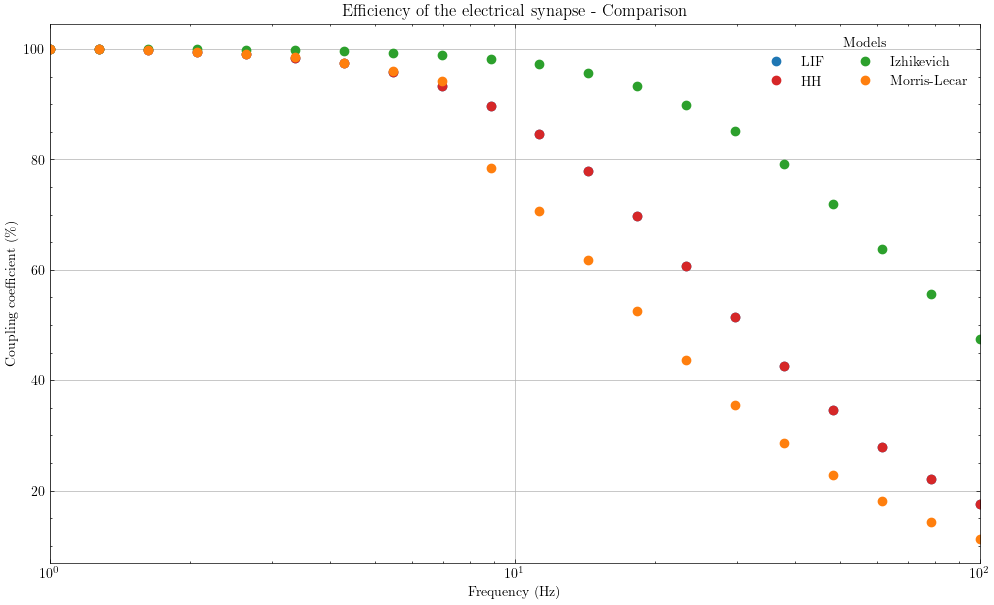

In [30]:
plt.plot(fIF,meanIF,'o', color = 'tab:blue',label = 'LIF')
plt.plot(fHH,meanHH, 'o', color = 'tab:red',label= 'HH')
plt.plot(fISH, meanISH, 'o',color = 'tab:green', label = 'Izhikevich')
plt.plot(fML,meanML,'o', color = 'tab:orange', label = 'Morris-Lecar')
plt.xscale('log')
plt.xlim(1,100)
plt.title('Efficiency of the electrical synapse - Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coupling coefficient (\%)')
plt.legend(title='Models',ncols=2)
plt.grid()

#### Results from 4B

Switch off synaptic coupling

HH model

In [160]:
Isyn = np.zeros(([2 , 2 ]))
I = [4, 0]
order = 5
V0 = -65 
n0 = 0.2
m0 = 0.1
h0 =0.6
dt =0.01
t_final = 100 
data4B_HH, completeHH_4B = rk_Icst(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)

LIF model

In [161]:
Isyn = np.zeros((2 , 2 ))
I = np.zeros((int(t_final/dt),2))
I[:,0] = 2.37

y0 = [-65 , -65]
dt=0.01
t_final=100
data4B_IF, complete_IF_4B = rk_if(dt, t_final,order,y0,*params_LIF,I,Isyn,k,tau,1)

Ishikevich model

In [162]:
Isyn = np.zeros((2 , 2 ))
I = np.zeros((int(t_final/dt),2))
I[:,0] = 2.0

y0 = [-65 , -65]
dt=0.01
t_final=100

data4B_Ish, complete_Ish_4B = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau,)

Morris-Lecar model

In [165]:
Isyn = np.zeros((2 , 2 ))
I = np.zeros((int(t_final/dt),2))
I[:,0] = 1.7

y0 = [-65 , -65]
dt=0.01
t_final=100


data4B_ML, complete_ML_4B = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)

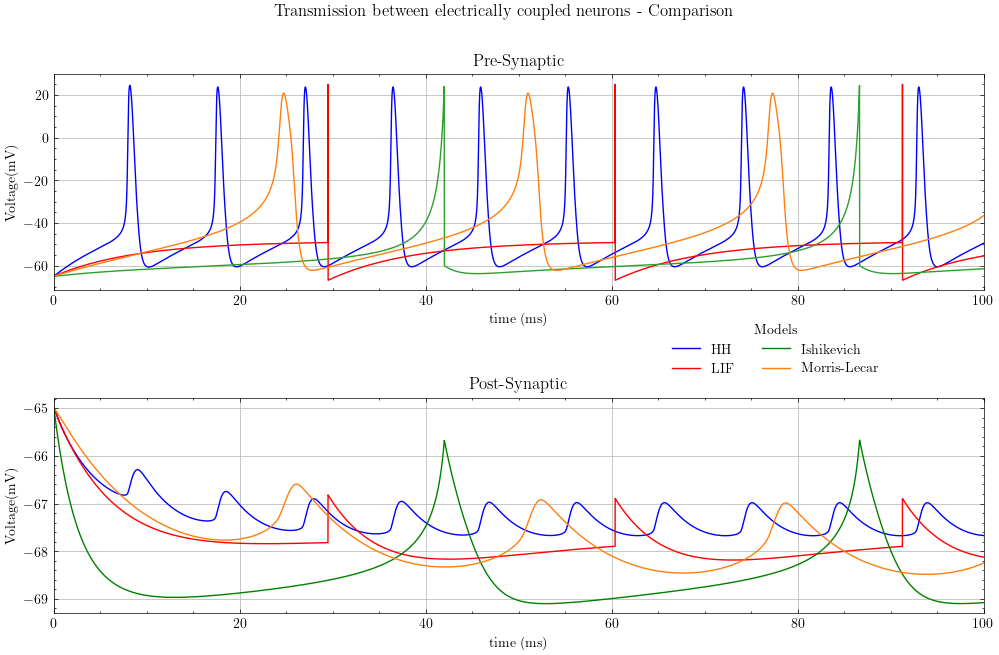

In [170]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)


plt.suptitle('Transmission between electrically coupled neurons - Comparison')

ax1.title.set_text('Pre-Synaptic')
ax1.plot(time,data4B_HH[:,0], color = 'b', label = 'HH')
ax1.plot(time,data4B_IF[:,0], color = 'r', label = 'LIF')
ax1.plot(time,data4B_Ish[:,0], color = 'tab:green', label = 'Ishikevich')
ax1.plot(time,data4B_ML[:,0], label = 'Morris-Lecar', color = 'tab:orange')

ax2.title.set_text('Post-Synaptic')

ax2.plot(time,data4B_HH[:,1], label = 'HH', color = 'b')
ax2.plot(time,data4B_IF[:,1], label =' LIF', color= 'red')
ax2.plot(time,data4B_Ish[:,1], label = 'Ishikevich', color = 'green')
#ax2.plot(time,complete_Ish_4B[:,1], label = 'Ishikevich', color = 'red')
ax2.plot(time,data4B_ML[:,1], color = 'tab:orange', label = ' Morris-Lecar')

ax2.legend(title = 'Models',bbox_to_anchor=(0.9, 1.4), ncols = 2)
ax1.grid()
ax2.grid()

plt.show()

#### Results from 6

HH model

In [171]:
Isyn = np.zeros(([2 , 2 ]))
tau = 0.3
V0 = -60
n0 = 0.2 
m0 = 0.1 
h0 = 0.6 
dt = 0.01
t_final =200 
order = 5

I = np.zeros((int(t_final/dt), 2))

x1 = np.random.normal(0,5,int(t_final/dt))
x2 = np.random.normal(0,5,int(t_final/dt))

I[:,0] = 2 + 5 *x1 
I[:,1] = 1.5 + 5*x2 
data6_HH, completeHH_6 = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)

LIF model

In [172]:
Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-60, -60]
dt = 0.01
t_final = 200

data6_IF, complete_IF_6 = rk_if(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,0.7)

Ishikevich model

In [173]:

Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-60, -60]
u0 = [0,0]
dt = 0.01
t_final = 200

data6_Ish, complete_Ish_6 = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)

Morris-Lecar model

In [174]:
Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-60 , -60]
dt=0.01
t_final=200


data6_ML, complete_ML_6 = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)

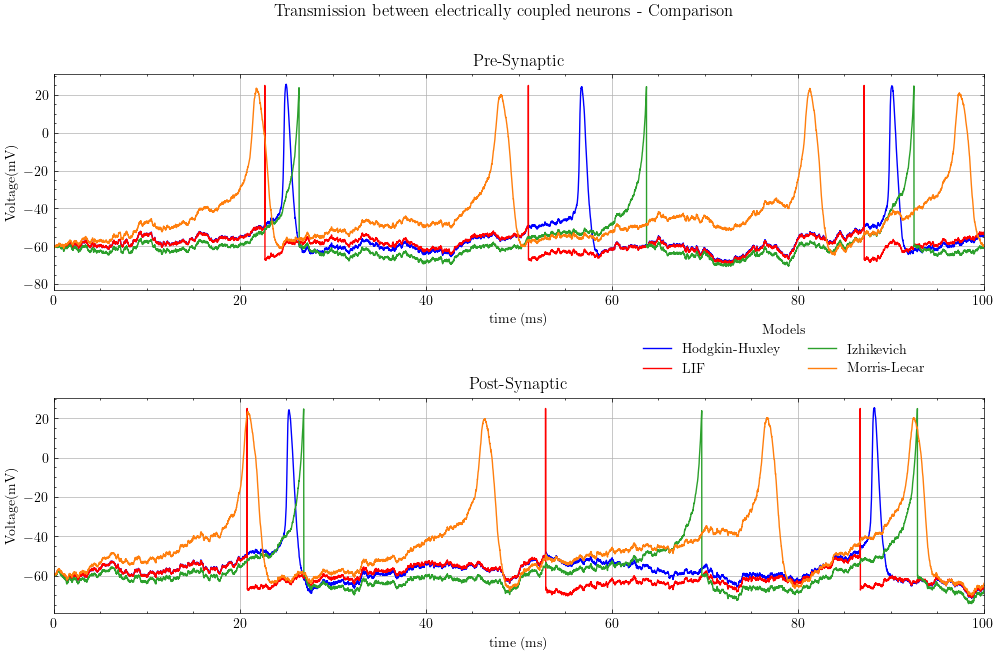

In [175]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)


plt.suptitle('Transmission between electrically coupled neurons - Comparison')

ax1.title.set_text('Pre-Synaptic')
ax1.plot(time,data6_HH[:,0], color = 'b', label = 'HH')
ax1.plot(time,data6_IF[:,0], color = 'r', label = 'LIF')
ax1.plot(time,data6_Ish[:,0], color = 'tab:green', label = 'Izhikevich')
ax1.plot(time,data6_ML[:,0], color = 'tab:orange', label = 'Morris-Lecar' )

ax2.title.set_text('Post-Synaptic')

ax2.plot(time,data6_HH[:,1], label = 'Hodgkin-Huxley', color = 'b')
ax2.plot(time,data6_IF[:,1], label =' LIF', color= 'red')
ax2.plot(time,data6_Ish[:,1], color = 'tab:green', label = 'Izhikevich')
ax2.plot(time,data6_ML[:,1], color = 'tab:orange', label = 'Morris-Lecar')



ax2.legend(title = 'Models',bbox_to_anchor=(0.95, 1.4),ncols=2)
ax1.grid()
ax2.grid()

plt.show()

#### Results from 5a

Train of action potentials in pre-synaptic cell, producing different responses in the post-synaptic cell in function of at which voltage the post-synaptic cell is held at

HH model

In [176]:
Isyn = np.zeros(([2 , 2 ]))
tau = 0.3
V0 = -80
n0 = 0.00016010320279088956
m0 = 0.0
h0 = 1.0
dt = 0.01
t_final =200 
order = 5
k = 0.012

I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2
    I[i,1] = -1
data5a_HH, completeHH_5a = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)

IF model

In [177]:
I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2.5
    I[i,1] = -1

In [178]:
Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-80, -80]
dt = 0.01
t_final = 200
order = 2
data5a_IF, complete_IF_5a = rk_if(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,0.7)

Izhikevich model

In [179]:
I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2.35
    I[i,1] = -1


Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-80, -80]
u0 = [0,0]
dt = 0.01
t_final = 200

data5a_Ish, complete_Ish_5a = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)

Morris-Lecar

In [180]:
I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2.35
    I[i,1] = -1


Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-80 , -80]
dt=0.01
t_final=200


data5a_ML, complete_ML_5a = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)

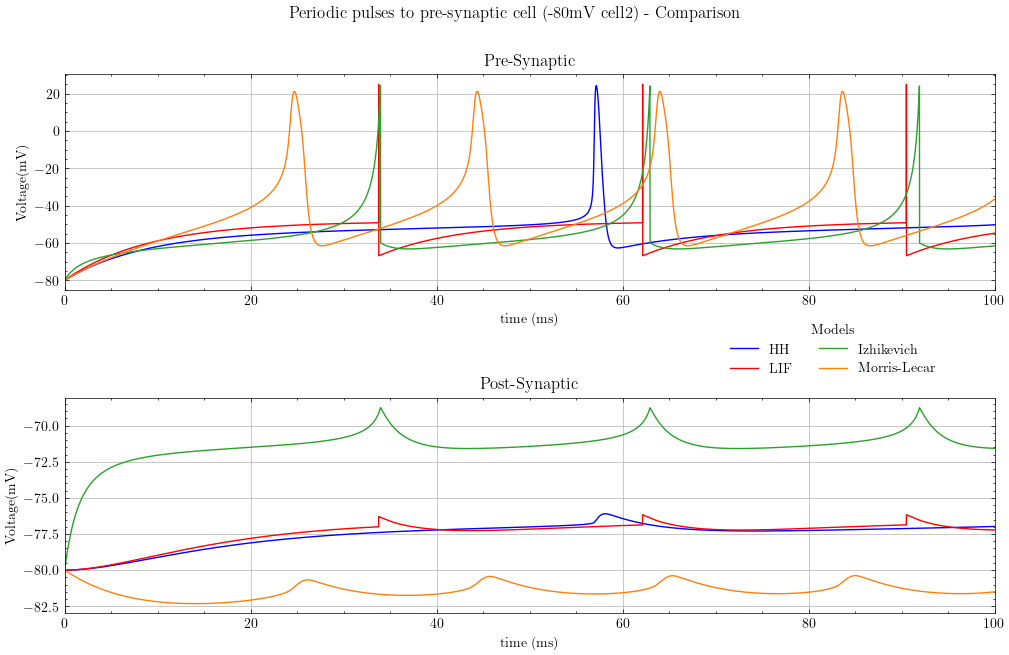

In [181]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)


plt.suptitle('Periodic pulses to pre-synaptic cell (-80mV cell2) - Comparison')

ax1.title.set_text('Pre-Synaptic')
ax1.plot(time,data5a_HH[:,0], color = 'b', label = 'HH')
ax1.plot(time,data5a_IF[:,0], color = 'r', label = 'LIF')
ax1.plot(time,data5a_Ish[:,0], color = 'tab:green', label = 'Izhikevich')
ax1.plot(time,data5a_ML[:,0],label= 'Morris-Lecar', color = 'tab:orange')

ax2.title.set_text('Post-Synaptic')

ax2.plot(time,data5a_HH[:,1], label = 'HH', color = 'b')
ax2.plot(time,data5a_IF[:,1], label =' LIF', color= 'red')
ax2.plot(time,data5a_Ish[:,1], label = 'Izhikevich', color = 'tab:green')
ax2.plot(time,data5a_ML[:,1],label= 'Morris-Lecar', color = 'tab:orange')


ax2.legend(title = 'Models',bbox_to_anchor=(0.95, 1.4),ncols=2)
ax1.grid()
ax2.grid()

plt.show()

HH

In [182]:
Isyn = np.zeros(([2 , 2 ]))
tau = 0.3
V0 = -53.67524228712408
n0 = 0.2 
m0 = 0.1 
h0 = 0.6 
dt = 0.01
t_final =200 
k = 0.012
I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2
    I[i,1] = 1.41
data5a2_HH, completeHH_5a2 = rk_simplemodel(dt,t_final,5,[-70,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)

LIF

In [183]:
I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2.35
    I[i,1] = 1.71

In [184]:
Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-70, -54.55483869393954]
dt = 0.01
t_final = 200
data5a2_IF, complete_IF_5a2 = rk_if(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,0.7)

Izhikevich

In [185]:
I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2.35
    I[i,1] = 1.11


Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-80, -80]
u0 = [0,0]
dt = 0.01
t_final = 200

data5a2_Ish, complete_Ish_5a2 = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)

Morris-Lecar

In [186]:
I = np.zeros((int(t_final/dt), 2))

for i in range(20000):
    I[i,0] = 2.35
    I[i,1] = 0.3


Is = np.array([ [0, 0.05], [0.05, 0]])
tau = 0.65
y0 = [-80 , -80]
dt=0.01
t_final=200


data5a2_ML, complete_ML_5a2 = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)

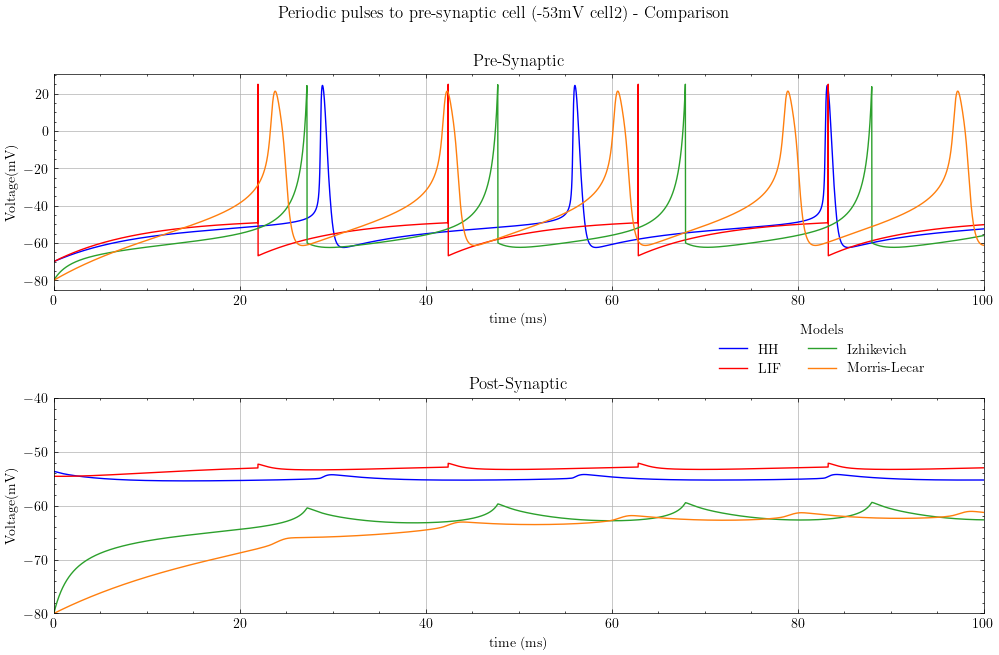

In [187]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)
ax2.set_ylim(-80,-40)

plt.suptitle('Periodic pulses to pre-synaptic cell (-53mV cell2) - Comparison')

ax1.title.set_text('Pre-Synaptic')
ax1.plot(time,data5a2_HH[:,0], color = 'b', label = 'HH')
ax1.plot(time,data5a2_IF[:,0], color = 'r', label = 'LIF')
ax1.plot(time,data5a2_Ish[:,0], color = 'tab:green', label = 'Izhikevich')
ax1.plot(time,data5a2_ML[:,0], label = 'Morris-Lecar', color = 'tab:orange')

ax2.title.set_text('Post-Synaptic')

ax2.plot(time,data5a2_HH[:,1], label = 'HH', color = 'b')
ax2.plot(time,data5a2_IF[:,1], label =' LIF', color= 'red')
ax2.plot(time,data5a2_Ish[:,1], color = 'tab:green', label = 'Izhikevich')
ax2.plot(time,data5a2_ML[:,1], label = 'Morris-Lecar', color = 'tab:orange')



ax2.legend(title = 'Models',bbox_to_anchor=(0.95, 1.4),ncols=2)
ax1.grid()
ax2.grid()

plt.show()

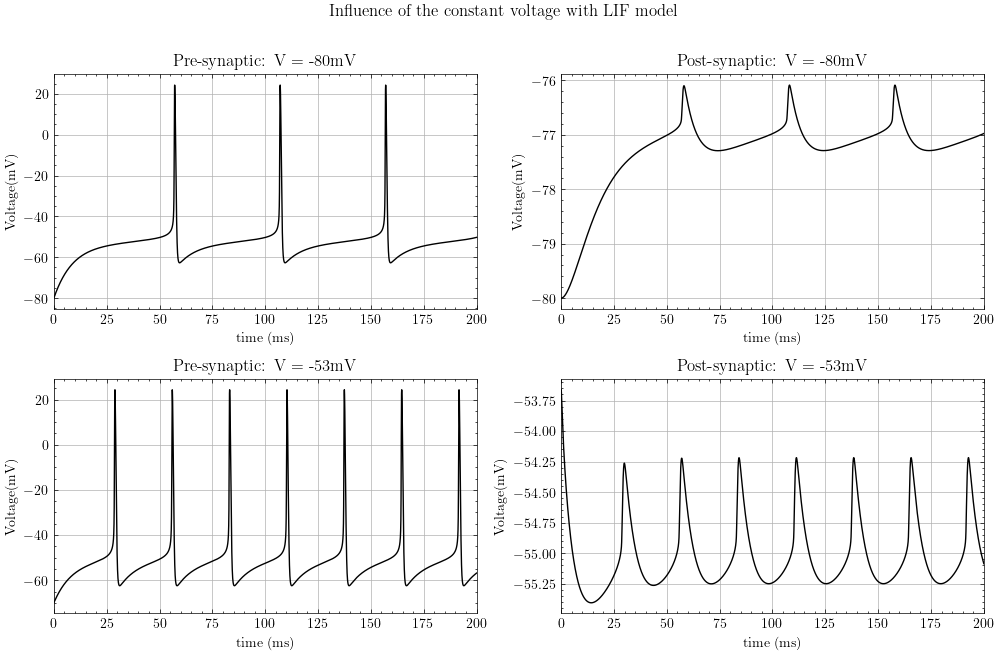

In [188]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2) 

fig.subplots_adjust(hspace=0.3)
color = 'black'
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')
ax3.set_xlabel('time (ms)')
ax4.set_xlabel('time (ms)')

ax1.set_xlim(0,200)
ax2.set_xlim(0,200)
ax3.set_xlim(0,200)
ax4.set_xlim(0,200)

ax1.set_ylabel('Voltage(mV)', color = color)
ax2.set_ylabel('Voltage(mV)', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2.tick_params(axis = 'y', labelcolor = color)
ax3.set_ylabel('Voltage(mV)', color = color)
ax4.set_ylabel('Voltage(mV)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)

plt.suptitle('Influence of the constant voltage with LIF model')

ax1.title.set_text(r'Pre-synaptic: V = -80mV')
ax3.title.set_text(r'Pre-synaptic: V = -53mV')
ax2.title.set_text(r'Post-synaptic: V = -80mV ')
ax4.title.set_text(r'Post-synaptic: V = -53mV')

ax1.plot(time,data5a_HH[:,0], color = 'black', label = 'LIF')
ax2.plot(time,data5a_HH[:,1], label =' LIF', color= 'black')


ax3.plot(time,data5a2_HH[:,0], color = 'black', label = 'LIF')


ax4.plot(time,data5a2_HH[:,1], label =' LIF', color= 'black')


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

#### Influence of Isyn in inhibitory neurons

For that, let's reproduce experiment number 6 for different values of Isyn, and tau. Let's work firsrt only with the LIF model.

Let's fix the same intensity for all tries

In [48]:
y0 = [-60, -60]
dt = 0.01
t_final = 200

k = 0.012 #turning of coupling

In [49]:
I = np.zeros((int(t_final/dt), 2))

x1 = np.random.normal(0,5,int(t_final/dt))
x2 = np.random.normal(0,5,int(t_final/dt))

I[:,0] = 2 + 5 *x1 
I[:,1] = 1.5 + 5*x2 

In [50]:
I = np.zeros((int(t_final/dt), 2))
I[:,0] = 2.37

In [51]:
data_taucte = np.zeros((int(t_final/dt),3 * 40))
data_taucte_HH = np.zeros((int(t_final/dt),3 * 40))
V0 = -65
Isyn = 0
tau = 0.65
for i in range(0,40):
    Isyn =  0.006 * (i+1) 
    Is = np.array([[ 0.0, Isyn], [Isyn, 0.0]])
    data_7_IF, complete_IF_7 = rk_if(dt,t_final,order,y0,*params_LIF,I,Is,k,tau,0.7)
    data_7_HH, complete_HH_7 = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Is,k,tau)
    data_taucte[:,3*i] = data_7_IF[:,0]
    data_taucte[:,1 + 3*i] = data_7_IF[:,1]
    data_taucte[:,2 + 3*i] = Isyn 
    data_taucte_HH[:,3*i] = data_7_HH[:,0]
    data_taucte_HH[:,1 + 3*i] = data_7_HH[:,1]
    data_taucte_HH[:,2 + 3*i] = Isyn 

In [52]:
data_Icte = np.zeros((int(t_final/dt),3 * 40))
data_Icte_HH = np.zeros((int(t_final/dt),3 * 40))

Isyn = 0.05
Is = np.array([[ 0.0, Isyn], [Isyn, 0.0]])
for i in range(0,40):
    tau =  0.05 * (i+1) 
    data_7_IF, complete_IF_7 = rk_if(dt,t_final,order,y0,*params_LIF,I,Is,k,tau,0.7)
    data_7_HH, complete_HH_7 = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Is,k,tau)

    data_Icte[:,3*i] = data_7_IF[:,0]
    data_Icte[:,1 + 3*i] = data_7_IF[:,1]
    data_Icte[:,2 + 3*i] = tau 
    data_Icte_HH[:,3*i] = data_7_HH[:,0]
    data_Icte_HH[:,1 + 3*i] = data_7_HH[:,1]
    data_Icte_HH[:,2 + 3*i] = tau 

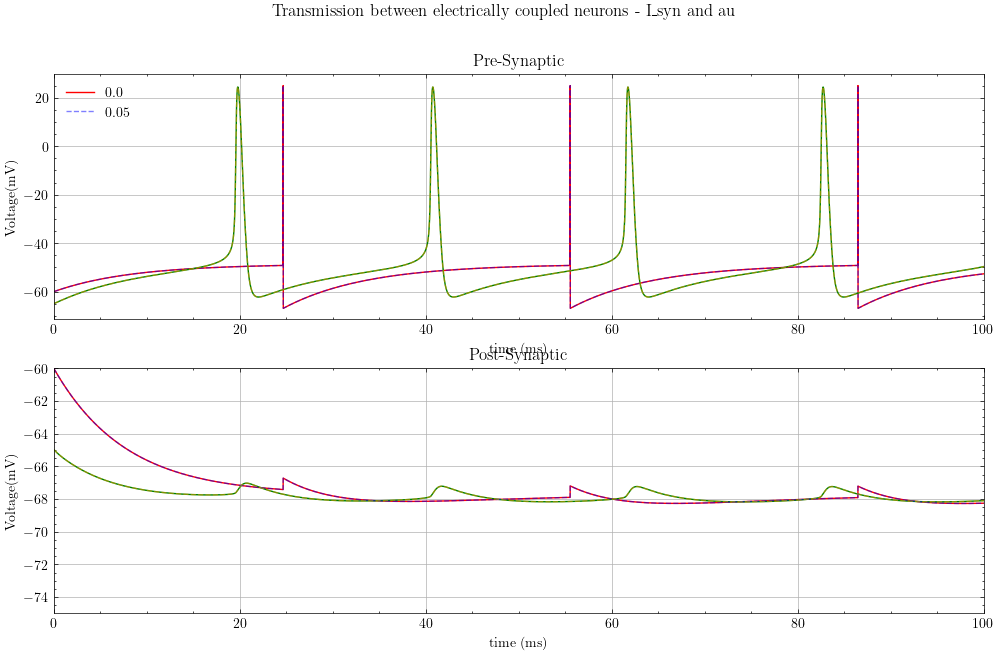

In [53]:
def animate(i):
    line1.set_data(time,data_taucte[:,3*i])
    line2.set_data(time,data_taucte[:,1+3*i])
    line1.set_label(data_taucte[0,2+3*i])
    line2.set_label(data_taucte[0,2+3*i])
    line3.set_data(time,data_Icte[:,3*i])
    line4.set_data(time,data_Icte[:,1+3*i])
    line3.set_label(data_Icte[0,2+3*i])
    line6.set_data(time,data_taucte_HH[:,1+3*i])
    line7.set_data(time,data_Icte_HH[:,3*i])
    line8.set_data(time,data_Icte_HH[:,1+3*i])
    line5.set_data(time,data_taucte_HH[:,3*i])
    ax1.legend(loc='upper left')


fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.grid()
ax2.grid()
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)
ax2.set_ylim(-75,-60)

plt.suptitle('Transmission between electrically coupled neurons - I_syn and \tau')
ax1.title.set_text('Pre-Synaptic')

line1, = ax1.plot(time,data_taucte[:,0], label = data_taucte[0,2], color = 'red')
line3, = ax1.plot(time,data_Icte[:,0], '--',label = data_Icte[0,2], color = 'blue', alpha =0.5)

line5, = ax1.plot(time,data_taucte_HH[:,0], color = 'green')
line7, = ax1.plot(time,data_Icte_HH[:,0], '--', color = 'orange', alpha =0.5)

ax2.title.set_text('Post-Synaptic')

line2, = ax2.plot(time,data_taucte[:,1], label = data_taucte[0,2], color= 'red')
line6, = ax2.plot(time,data_taucte_HH[:,1], label = data_taucte[0,2], color= 'green')

line4, = ax2.plot(time,data_Icte[:,1],'--', color= 'blue', alpha = 0.5)
line8, = ax2.plot(time,data_Icte_HH[:,1],'--', color= 'orange', alpha = 0.5)

ani = animation.FuncAnimation(fig, animate, frames=40, interval=1)
ani.save('prueba.gif',writer='pillow',fps=1)

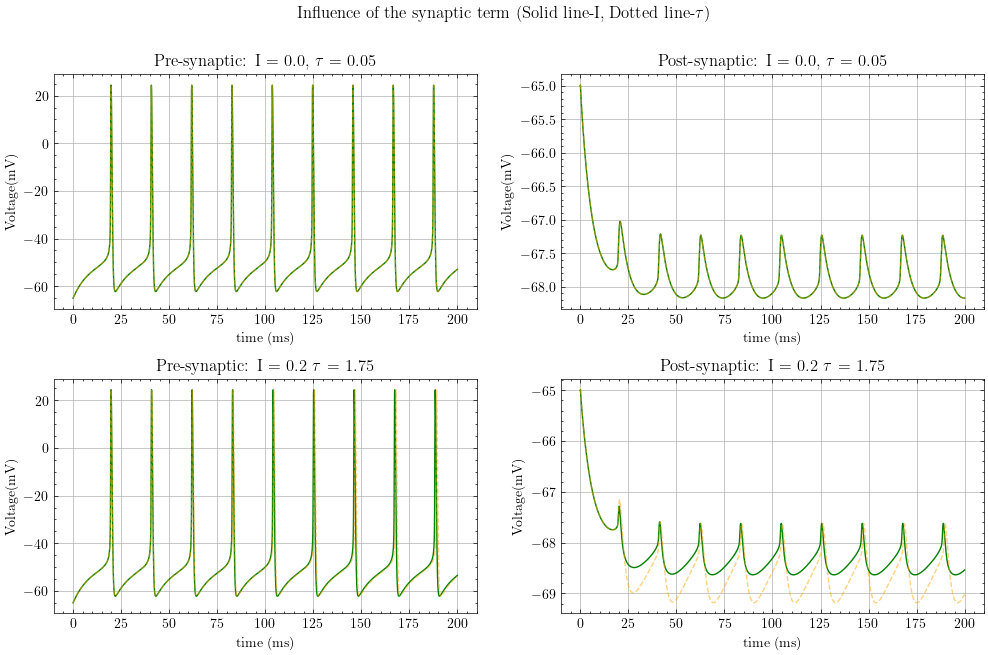

In [54]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2) 

fig.subplots_adjust(hspace=0.3)
color = 'black'
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')
ax3.set_xlabel('time (ms)')
ax4.set_xlabel('time (ms)')

ax1.set_ylabel('Voltage(mV)', color = color)
ax2.set_ylabel('Voltage(mV)', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2.tick_params(axis = 'y', labelcolor = color)
ax3.set_ylabel('Voltage(mV)', color = color)
ax4.set_ylabel('Voltage(mV)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)

plt.suptitle(r'Influence of the synaptic term (Solid line-I, Dotted line-$\tau$)')

ax1.title.set_text(r'Pre-synaptic: I = 0.0, $\tau$ = 0.05')
ax3.title.set_text(r'Pre-synaptic: I = 0.2 $\tau$ = 1.75')

#line1, = ax1.plot(time,data_taucte[:,0], label = data_taucte[0,2], color = 'red')
#line3, = ax1.plot(time,data_Icte[:,0], '--',label = data_Icte[0,2], color = 'blue', alpha =0.5)

line5, = ax1.plot(time,data_taucte_HH[:,0], color = 'green')
line7, = ax1.plot(time,data_Icte_HH[:,0], '--', color = 'orange', alpha =0.5)

ax2.title.set_text(r'Post-synaptic: I = 0.0, $\tau$ = 0.05')

#line2, = ax2.plot(time,data_taucte[:,1], label = data_taucte[0,2], color= 'red')
line6, = ax2.plot(time,data_taucte_HH[:,1], label = data_taucte[0,2], color= 'green')

#line4, = ax2.plot(time,data_Icte[:,1],'--', color= 'blue', alpha = 0.5)
line8, = ax2.plot(time,data_Icte_HH[:,1],'--', color= 'orange', alpha = 0.5)


#line9, = ax3.plot(time,data_taucte[:,102], label = data_taucte[0,104], color = 'red')
#line10, = ax3.plot(time,data_Icte[:,102], '--',label = data_Icte[0,104], color = 'blue', alpha =0.5)

line11, = ax3.plot(time,data_taucte_HH[:,102], color = 'green')
line12, = ax3.plot(time,data_Icte_HH[:,102], '--', color = 'orange', alpha =0.5)

ax4.title.set_text(r'Post-synaptic: I = 0.2 $\tau$ = 1.75')

#line13, = ax4.plot(time,data_taucte[:,103], label = data_taucte[0,104], color= 'red')
line14, = ax4.plot(time,data_taucte_HH[:,103], label = data_taucte[0,104], color= 'green')

#line15, = ax4.plot(time,data_Icte[:,103],'--', color= 'blue', alpha = 0.5)
line16, = ax4.plot(time,data_Icte_HH[:,103],'--', color= 'orange', alpha = 0.5)



ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()